In [73]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import spacy
from spacy import displacy
import string
import random

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [50]:
# reading data
raw_data=pd.read_excel(r'C:\Users\EX912FN\OneDrive - EY\Documents\Debopriya Ghosh\Project\NLP\automatic_text_classification_POC\input_data_3.xlsx')
raw_data.head()

Input_Keywords  Category  \
0                      Happy Birthday Robert!  Birthday   
1                      Happy Birthday Priyam!  Birthday   
2                        Happy Birthday Aman!  Birthday   
3                        Happy Birthday Saif!  Birthday   
4  Many Many Happy Returns of the Day, Putin!  Birthday   

                                           Full_text  
0  Happy Birthday! Hope all your birthday wishes ...  
1  A wish for you on your birthday, whatever you ...  
2  Another adventure filled year awaits you. Welc...  
3  Count not the candles…see the lights they give...  
4  Happy Birthday! Hope all your birthday wishes ...

In [51]:
raw_data.Category.value_counts()

NewHire             10
Work Anniversary    10
Birthday             9
Appreciation         9
Promotion            8
Award                4
Name: Category, dtype: int64

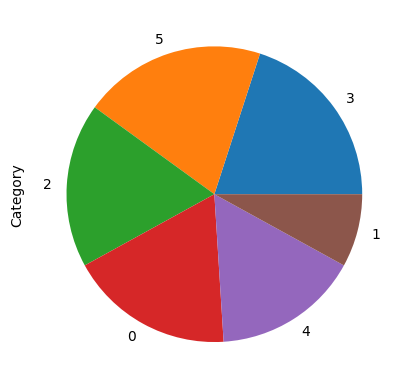

In [91]:
raw_data.Category.value_counts(normalize=True).plot.pie()
plt.show()

## Word cloud on raw text

In [52]:
# Word cloud visualization
def display_wordcloud(text):
    wc = wordcloud.WordCloud(width=800, height=480, background_color ='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc)
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

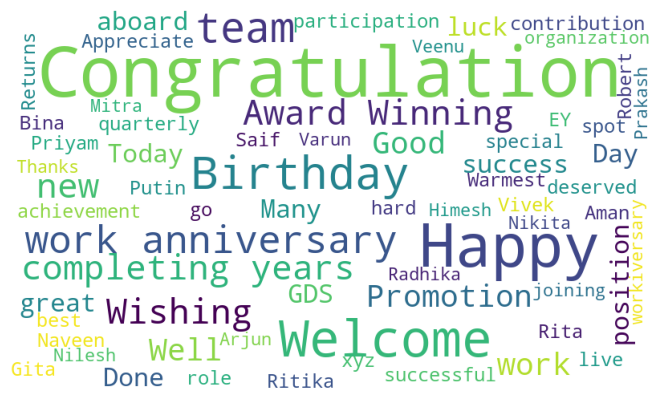

In [53]:
text=' '.join(raw_data['Input_Keywords'])
display_wordcloud(text)

In [54]:
# Named entity recognition (NER)
NER = spacy.load('en_core_web_lg')

In [55]:
# NER visualization in input text
for row in raw_data['Input_Keywords']:
    text_data = NER(row)
    displacy.render(text_data,style="ent",jupyter=True)

In [56]:
# Function for Text pre-processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = NER(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    tokenized_word = word_tokenize(text)
    doc = doc.replace("</br>", " ") 
    doc = doc.replace("-", " ") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    #doc = " ".join([token for token in doc.split() if token not in stopwords]) 
    doc = " ".join([token for token in word_tokenize(doc) if token not in stop_words]) 
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [57]:
# Calling text preprocessing function for one datapoint
clean(raw_data['Input_Keywords'][0])

'happy birthday'

In [58]:
# Created new column with preprocessed text
raw_data['cleaned_Input_Keywords'] = raw_data['Input_Keywords'].apply(clean)
raw_data.head()

Input_Keywords  Category  \
0                      Happy Birthday Robert!  Birthday   
1                      Happy Birthday Priyam!  Birthday   
2                        Happy Birthday Aman!  Birthday   
3                        Happy Birthday Saif!  Birthday   
4  Many Many Happy Returns of the Day, Putin!  Birthday   

                                           Full_text  \
0  Happy Birthday! Hope all your birthday wishes ...   
1  A wish for you on your birthday, whatever you ...   
2  Another adventure filled year awaits you. Welc...   
3  Count not the candles…see the lights they give...   
4  Happy Birthday! Hope all your birthday wishes ...   

        cleaned_Input_Keywords  
0               happy birthday  
1        happy birthday priyam  
2          happy birthday aman  
3               happy birthday  
4  many many happy returns day

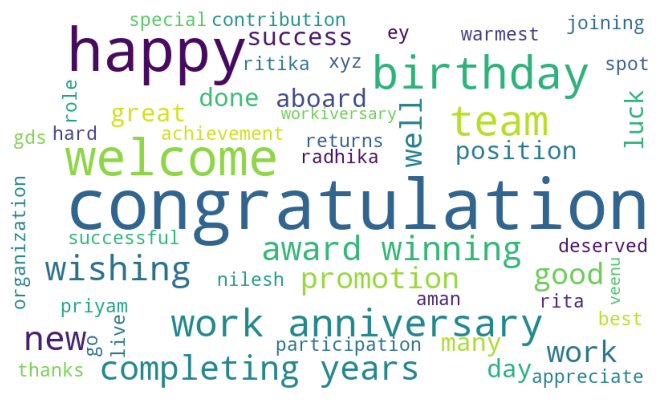

In [59]:
# word cloud on processed text
text=' '.join(raw_data['cleaned_Input_Keywords'])
display_wordcloud(text)

## Target Encoding

In [60]:
raw_data.head()

Input_Keywords  Category  \
0                      Happy Birthday Robert!  Birthday   
1                      Happy Birthday Priyam!  Birthday   
2                        Happy Birthday Aman!  Birthday   
3                        Happy Birthday Saif!  Birthday   
4  Many Many Happy Returns of the Day, Putin!  Birthday   

                                           Full_text  \
0  Happy Birthday! Hope all your birthday wishes ...   
1  A wish for you on your birthday, whatever you ...   
2  Another adventure filled year awaits you. Welc...   
3  Count not the candles…see the lights they give...   
4  Happy Birthday! Hope all your birthday wishes ...   

        cleaned_Input_Keywords  
0               happy birthday  
1        happy birthday priyam  
2          happy birthday aman  
3               happy birthday  
4  many many happy returns day

In [61]:
label_encoder=LabelEncoder()
raw_data.loc[:,'Category']=label_encoder.fit_transform(raw_data.loc[:,'Category'])
raw_data.head()

Input_Keywords  Category  \
0                      Happy Birthday Robert!         2   
1                      Happy Birthday Priyam!         2   
2                        Happy Birthday Aman!         2   
3                        Happy Birthday Saif!         2   
4  Many Many Happy Returns of the Day, Putin!         2   

                                           Full_text  \
0  Happy Birthday! Hope all your birthday wishes ...   
1  A wish for you on your birthday, whatever you ...   
2  Another adventure filled year awaits you. Welc...   
3  Count not the candles…see the lights they give...   
4  Happy Birthday! Hope all your birthday wishes ...   

        cleaned_Input_Keywords  
0               happy birthday  
1        happy birthday priyam  
2          happy birthday aman  
3               happy birthday  
4  many many happy returns day

## TFI-DF Vectorizer

In [62]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.95) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(list(raw_data['cleaned_Input_Keywords']))

In [63]:
pd.DataFrame(tfidf_vectorizer_vectors.toarray(), columns = tfidf_vectorizer.get_feature_names(), index = raw_data['cleaned_Input_Keywords'])

aboard  anniversary     award  \
cleaned_Input_Keywords                                                     
happy birthday                           0.000000     0.000000  0.000000   
happy birthday priyam                    0.000000     0.000000  0.000000   
happy birthday aman                      0.000000     0.000000  0.000000   
happy birthday                           0.000000     0.000000  0.000000   
many many happy returns day              0.000000     0.000000  0.000000   
wishing happy birthday                   0.000000     0.000000  0.000000   
special day rita                         0.000000     0.000000  0.000000   
birthday                                 0.000000     0.000000  0.000000   
happy birthday                           0.000000     0.000000  0.000000   
congratulations promotion                0.000000     0.000000  0.000000   
congratulations new role                 0.000000     0.000000  0.000000   
congratulations new position             0.000000     0.000000  0.000000   
congratulations promotion                0.000000     0.000000  0.000000   
good luck new position                   0.000000     0.000000  0.000000   
warmest congratulations achievement      0.000000     0.000000  0.000000   
congratulations well deserved success    0.000000     0.000000  0.000000   
good luck new promotion                  0.000000     0.000000  0.000000   
congratulations spot award winning       0.000000     0.000000  0.622369   
congratulations best team award winning  0.000000     0.000000  0.543174   
congratulations award winning            0.000000     0.000000  0.622369   
congratulations xyz award winning        0.000000     0.000000  0.622369   
congratulation successful go live        0.000000     0.000000  0.000000   
congratulation participation             0.000000     0.000000  0.000000   
congratulation contribution              0.000000     0.000000  0.000000   
congratulation great success             0.000000     0.000000  0.000000   
appreciate hard work                     0.000000     0.000000  0.000000   
great work                               0.000000     0.000000  0.000000   
good team work                           0.000000     0.000000  0.000000   
well done team                           0.000000     0.000000  0.000000   
well done ritika                         0.000000     0.000000  0.000000   
welcome ey gds                           0.000000     0.000000  0.000000   
welcome organization                     0.000000     0.000000  0.000000   
welcome team nilesh                      0.000000     0.000000  0.000000   
welcome aboard                           0.824653     0.000000  0.000000   
welcome aboard                           0.824653     0.000000  0.000000   
welcome team                             0.000000     0.000000  0.000000   
thanks joining team                      0.000000     0.000000  0.000000   
welcome radhika                          0.000000     0.000000  0.000000   
welcome                                  0.000000     0.000000  0.000000   
welcome                                  0.000000     0.000000  0.000000   
congratulation completing years          0.000000     0.000000  0.000000   
congratulation completing years          0.000000     0.000000  0.000000   
congratulation completing years          0.000000     0.000000  0.000000   
congratulation completing years          0.000000     0.000000  0.000000   
happy workiversary                       0.000000     0.000000  0.000000   
happy work anniversary                   0.000000     0.660593  0.000000   
wishing happy work anniversary           0.000000     0.541446  0.000000   
happy work anniversary                   0.000000     0.660593  0.000000   
wishing happy work anniversary           0.000000     0.541446  0.000000   
wishing veenu happy work anniversary     0.000000     0.541446  0.000000   

                                         birthday  completing  congratulation  \
cleaned_I

## Train_test split

In [64]:
X_tfidf_vector = tfidf_vectorizer_vectors.toarray()
y = raw_data['Category']
print(X_tfidf_vector.shape, y.shape)

(50, 24) (50,)


In [65]:
SEED=123
X_tfidf_vector_train,X_tfidf_vector_test,y_train,y_test=train_test_split(X_tfidf_vector, y, train_size=0.8,test_size=0.2, random_state=SEED)
print(X_tfidf_vector_train.shape, y_train.shape)
print(X_tfidf_vector_test.shape, y_test.shape)

(40, 24) (40,)
(10, 24) (10,)


In [66]:
y_train.value_counts()

3    9
0    8
5    8
2    7
4    5
1    3
Name: Category, dtype: int64

In [67]:
y_test.value_counts()

4    3
5    2
2    2
3    1
1    1
0    1
Name: Category, dtype: int64

## Multinomial Naive Bayes

In [77]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_tfidf_vector_train, y_train)
y_train_pred = mnb_clf.predict(X_tfidf_vector_train)
y_test_pred = mnb_clf.predict(X_tfidf_vector_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy score:",accuracy_score(y_test, y_test_pred))


Training Accuracy score: 0.975
Testing Accuracy score: 1.0


In [78]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         5
           5       1.00      0.88      0.93         8

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



In [69]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



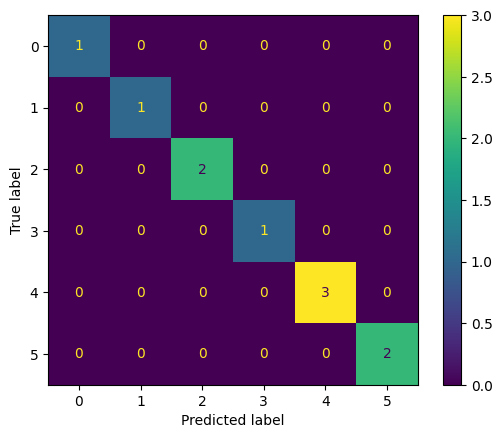

In [70]:
plot_confusion_matrix(mnb_clf,X_tfidf_vector_test,y_test)
plt.show()

In [71]:
raw_data.head()

Input_Keywords  Category  \
0                      Happy Birthday Robert!         2   
1                      Happy Birthday Priyam!         2   
2                        Happy Birthday Aman!         2   
3                        Happy Birthday Saif!         2   
4  Many Many Happy Returns of the Day, Putin!         2   

                                           Full_text  \
0  Happy Birthday! Hope all your birthday wishes ...   
1  A wish for you on your birthday, whatever you ...   
2  Another adventure filled year awaits you. Welc...   
3  Count not the candles…see the lights they give...   
4  Happy Birthday! Hope all your birthday wishes ...   

        cleaned_Input_Keywords  
0               happy birthday  
1        happy birthday priyam  
2          happy birthday aman  
3               happy birthday  
4  many many happy returns day

## Returned email text on test set based on Predicted Theme

In [72]:
y_test_pred_invs_transform = label_encoder.inverse_transform(y_test_pred)
for pred,cat in zip(y_test_pred,y_test_pred_invs_transform):
    return_text = raw_data[raw_data['Category']==pred]['Full_text'].to_list()
    print('Prediction:',cat,end='\n')
    print(random.choice(return_text))
    print('\n')

Prediction: Promotion
My heartfelt congratulation to you on your promotion. Your hard work has paid off.  Best Regards, EY HR Team.


Prediction: Promotion
You have added a new dimension to the page of your success. A new position means new responsibilities and obstacles, but you surely can overcome them—all the best to you. Best Regards, EY HR Team.


Prediction: NewHire
We are delighted to have you among us. On behalf of all the members and the management, we would like to extend our warmest welcome and good wishes!  Best Regards, EY HR Team.


Prediction: Work Anniversary
Every workplace needs someone who stands out from the rest and is an inspiration for everyone. Thank you for being that person, and we are proud of you and everything you have done so far. Happy work anniversary! Best Regards, EY HR Team.


Prediction: Award
Congratulations on the amazing news! This is an incredible milestone and you deserve the spotlight to celebrate the moment.  Best Regards, EY HR Team.


Predic

## Prediction for new text

In [33]:
enter_text = input("Enter context to generate email body: ")
#enter_text = "Congratulations on Promotion"
enter_clean_text = clean(enter_text)
#print(enter_clean_text)
input_vector = tfidf_vectorizer.transform([enter_clean_text])
#print(input_vector.toarray())
predicted_class = mnb_clf.predict(input_vector.toarray())
return_body = raw_data[raw_data['Category']==predicted_class[0]]['Full_text'].to_list()
print('\n')
print("Entered context has been classified as :",label_encoder.inverse_transform(predicted_class)[0])
print('\n')
print('Generated content: ',end='\n')
print(enter_text+' '+random.choice(return_body))

Enter context to generate email body: Congratulations Janhvi on your well-deserved promotion!


Entered context has been classified as : Promotion


Generated content: 
Congratulations Janhvi on your well-deserved promotion! My heartfelt congratulation to you on your promotion. Your hard work has paid off.  Best Regards, EY HR Team.


In [34]:
enter_text = input("Enter context to generate email body: ")

enter_clean_text = clean(enter_text)

input_vector = tfidf_vectorizer.transform([enter_clean_text])

predicted_class = mnb_clf.predict(input_vector.toarray())
return_body = raw_data[raw_data['Category']==predicted_class[0]]['Full_text'].to_list()
print('\n')
print("Entered context has been classified as :",label_encoder.inverse_transform(predicted_class)[0])
print('\n')
print('Generated content: ',end='\n')
print(enter_text+' '+random.choice(return_body))

Enter context to generate email body: Happy Birthday Thisu!


Entered context has been classified as : Birthday


Generated content: 
Happy Birthday Thisu! Happy Birthday! Wishing you the biggest slice of happy today. May God follow you in every step you take. Best Regards, EY HR Team.


In [35]:
enter_text = input("Enter context to generate email body: ")

enter_clean_text = clean(enter_text)

input_vector = tfidf_vectorizer.transform([enter_clean_text])

predicted_class = mnb_clf.predict(input_vector.toarray())
return_body = raw_data[raw_data['Category']==predicted_class[0]]['Full_text'].to_list()
print('\n')
print("Entered context has been classified as :",label_encoder.inverse_transform(predicted_class)[0])
print('\n')
print('Generated content: ',end='\n')
print(enter_text+' '+random.choice(return_body))

Enter context to generate email body: Many many happy returns Ichha!


Entered context has been classified as : Birthday


Generated content: 
Many many happy returns Ichha! A wish for you on your birthday, whatever you ask may you receive, whatever you seek may you find, whatever you wish may it be fulfilled on your birthday and always. Happy birthday! Best Regards, EY HR Team.


In [37]:
enter_text = input("Enter context to generate email body: ")

enter_clean_text = clean(enter_text)

input_vector = tfidf_vectorizer.transform([enter_clean_text])

predicted_class = mnb_clf.predict(input_vector.toarray())
return_body = raw_data[raw_data['Category']==predicted_class[0]]['Full_text'].to_list()
print('\n')
print("Entered context has been classified as :",label_encoder.inverse_transform(predicted_class)[0])
print('\n')
print('Generated content: ',end='\n')
print(enter_text+' '+random.choice(return_body))

Enter context to generate email body: Wishing you Good Luck on your Birthday, Bikash!


Entered context has been classified as : Birthday


Generated content: 
Wishing you Good Luck on your Birthday, Bikash! Count not the candles…see the lights they give. Count not the years, but the life you live. Wishing you a wonderful time ahead. Happy birthday. Best Regards, EY HR Team.


In [38]:
enter_text = input("Enter context to generate email body: ")

enter_clean_text = clean(enter_text)

input_vector = tfidf_vectorizer.transform([enter_clean_text])

predicted_class = mnb_clf.predict(input_vector.toarray())
return_body = raw_data[raw_data['Category']==predicted_class[0]]['Full_text'].to_list()
print('\n')
print("Entered context has been classified as :",label_encoder.inverse_transform(predicted_class)[0])
print('\n')
print('Generated content: ',end='\n')
print(enter_text+' '+random.choice(return_body))

Enter context to generate email body: Well Done F&A Team!


Entered context has been classified as : Appreciation


Generated content: 
Well Done F&A Team! Thank you for a job well done! We could not have made it without the team’s critical skills! Best Regards, EY HR Team.


In [92]:
enter_text = input("Enter context to generate email body: ")

enter_clean_text = clean(enter_text)

input_vector = tfidf_vectorizer.transform([enter_clean_text])

predicted_class = mnb_clf.predict(input_vector.toarray())
return_body = raw_data[raw_data['Category']==predicted_class[0]]['Full_text'].to_list()
print('\n')
print("Entered context has been classified as :",label_encoder.inverse_transform(predicted_class)[0])
print('\n')
print('Generated content: ',end='\n')
print(enter_text+' '+random.choice(return_body))

Enter context to generate email body: Congrats Sumita for winning best employee award!


Entered context has been classified as : Award


Generated content: 
Congrats Sumita for winning best employee award! Congratulations on your incredible success! I always knew you could do it, and I'm incredibly proud of you.  Best Regards, EY HR Team.


## Logistic Regression

In [24]:
lr = LogisticRegression(random_state=SEED)
lr.fit(X_tfidf_vector_train, y_train)

y_train_pred = lr.predict(X_tfidf_vector_train)
y_test_pred = lr.predict(X_tfidf_vector_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy score:",accuracy_score(y_test, y_test_pred))


Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



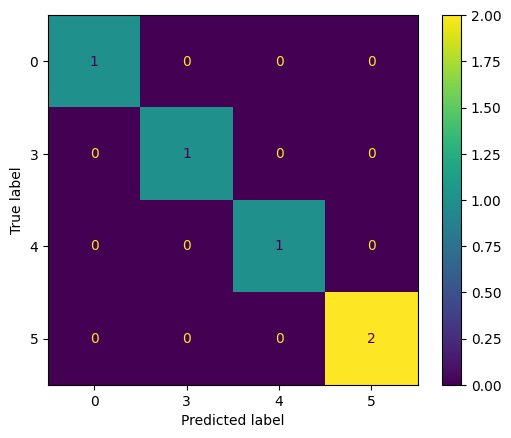

In [25]:
plot_confusion_matrix(lr,X_tfidf_vector_test,y_test)
plt.show()

## Support Vector Machines

In [81]:
svc =  LinearSVC(class_weight='balanced') 
svc.fit(X_tfidf_vector_train, y_train)

y_train_pred = svc.predict(X_tfidf_vector_train)
y_test_pred = svc.predict(X_tfidf_vector_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy score:",accuracy_score(y_test, y_test_pred))


Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [82]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



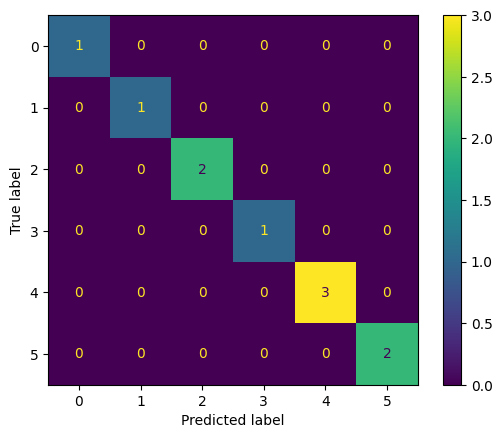

In [84]:
plot_confusion_matrix(svc,X_tfidf_vector_test,y_test)
plt.show()